In [1]:

import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-plot
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from tqdm import tqdm
import os
import random

In [2]:
train_dir = 'C:/Users/анатолий/Documents/datasets/archive/Training/'
test_dir = 'C:/Users/анатолий/Documents/datasets/archive/Testing/'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):#Функция listdir() возвращает список, содержащий имена файлов и директорий в каталоге
    for image in os.listdir(train_dir+label):
        train_paths.append(train_dir+label+'/'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

In [3]:
train_paths[:5],train_labels[:5]

(['C:/Users/анатолий/Documents/datasets/archive/Training/glioma/Tr-gl_1209.jpg',
  'C:/Users/анатолий/Documents/datasets/archive/Training/meningioma/Tr-me_1243.jpg',
  'C:/Users/анатолий/Documents/datasets/archive/Training/glioma/Tr-gl_1066.jpg',
  'C:/Users/анатолий/Documents/datasets/archive/Training/pituitary/Tr-pi_0938.jpg',
  'C:/Users/анатолий/Documents/datasets/archive/Training/notumor/Tr-no_1062.jpg'],
 ['glioma', 'meningioma', 'glioma', 'pituitary', 'notumor'])

In [4]:
len(train_paths),len(train_labels)

(5712, 5712)

In [5]:
labels = sorted(os.listdir(train_dir))
for n, item in enumerate(labels):
    print(n, item) 
    

0 glioma
1 meningioma
2 notumor
3 pituitary


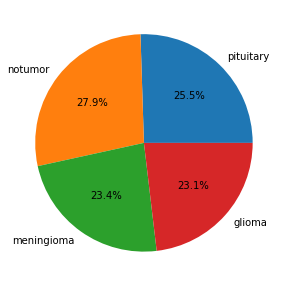

In [6]:
plt.figure(figsize=(9,5))
plt.pie([len([x for x in train_labels if x=='pituitary']),
         len([x for x in train_labels if x=='notumor']),
         len([x for x in train_labels if x=='meningioma']),
         len([x for x in train_labels if x=='glioma'])],
        labels=['pituitary','notumor', 'meningioma', 'glioma'],autopct='%.1f%%');
       

In [7]:
test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(test_dir+label):
        test_paths.append(test_dir+label+'/'+image)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

In [8]:
len(test_paths),len(test_labels)

(1311, 1311)

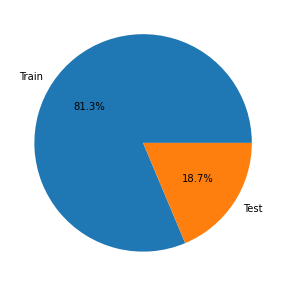

In [9]:
plt.figure(figsize=(9,5))
plt.pie([len(train_labels), len(test_labels)],
        labels=['Train','Test'],autopct='%.1f%%');       

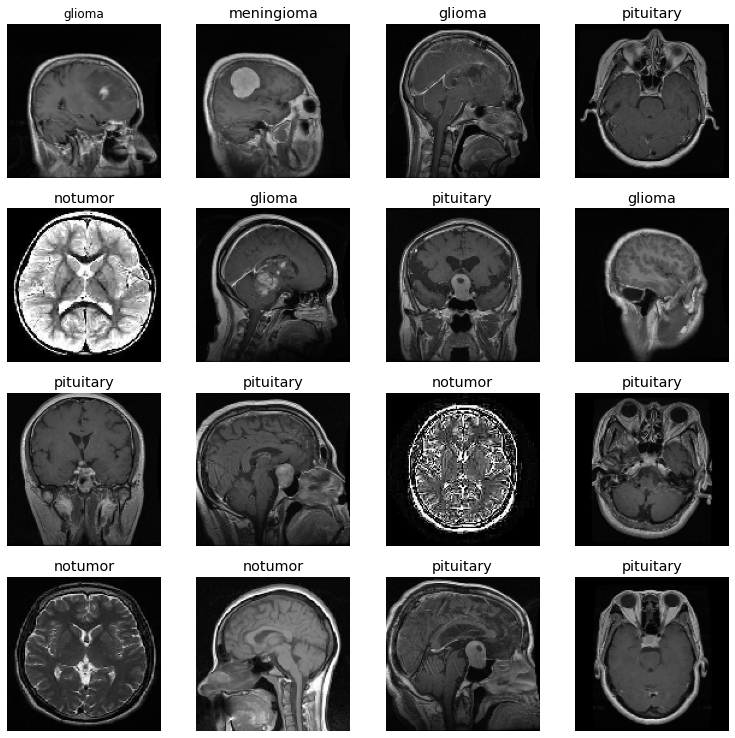

In [10]:

fig = plt.figure(figsize=(13, 13))

for i in range(16):
    fig.add_subplot(4, 4, i+1)
    image = load_img(train_paths[i], target_size=(128,128))
    labels = train_labels[i]
    plt.imshow(image)

    
    plt.axis('off')
    plt.title(labels)

    plt.rcParams.update({'font.size': 12})


In [11]:
BATCH_SIZE = 16 # количество тренировочных изображений для обработки перед обновлением параметров модели
IMG_SIZE = 128 # размерность к которой будет преведено входное изображение

In [12]:
def plotImages(images_arr):
    
    fig, axes = plt.subplots(1, 2, figsize=(15,15))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [13]:

image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SIZE, IMG_SIZE))

Found 5712 images belonging to 4 classes.


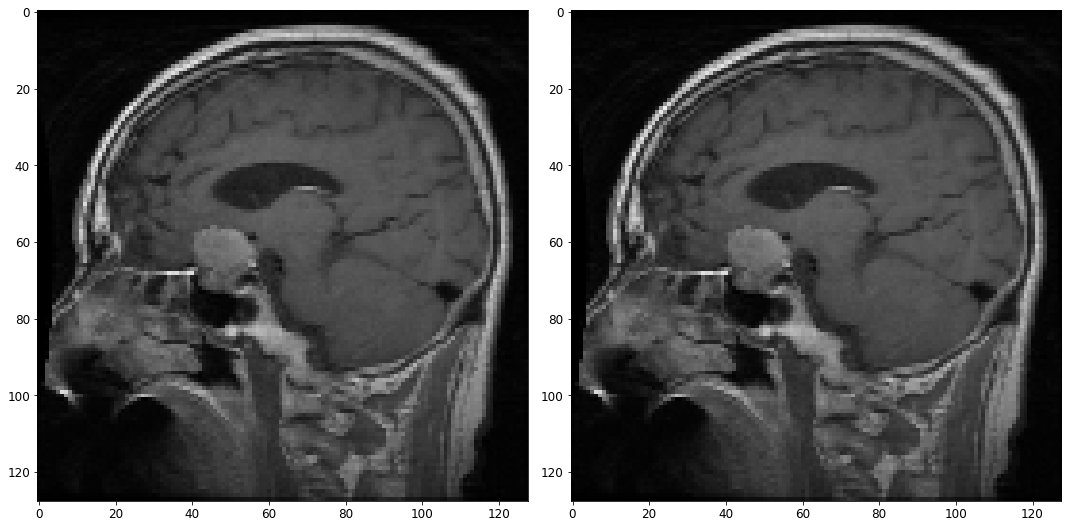

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(3)]
plotImages(augmented_images)

In [15]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=False,
                                               target_size=(IMG_SIZE, IMG_SIZE))

Found 5712 images belonging to 4 classes.


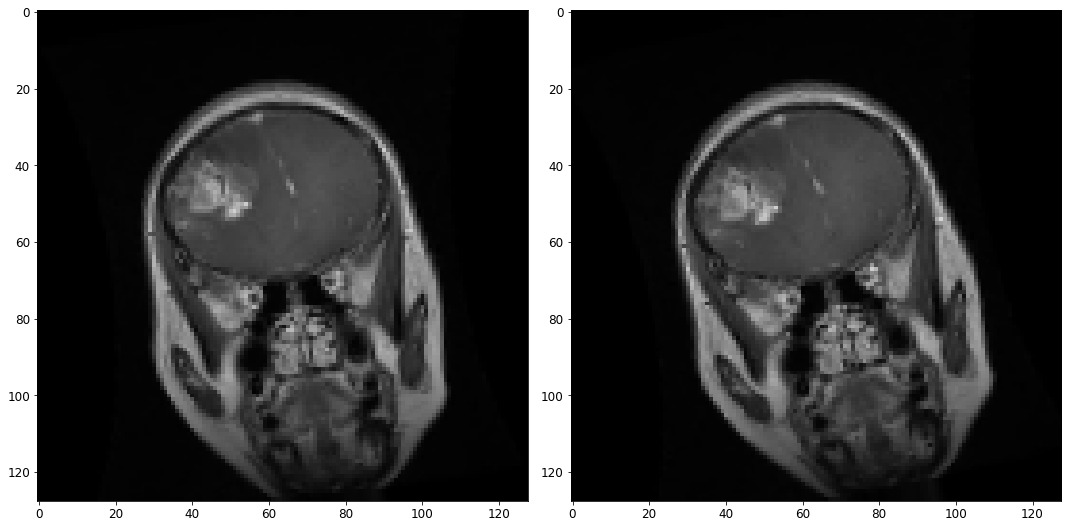

In [16]:
augmented_images = [train_data_gen[0][0][0] for i in range(3)]
plotImages(augmented_images)

In [17]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.25)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=False,
                                               target_size=(IMG_SIZE, IMG_SIZE))

Found 5712 images belonging to 4 classes.


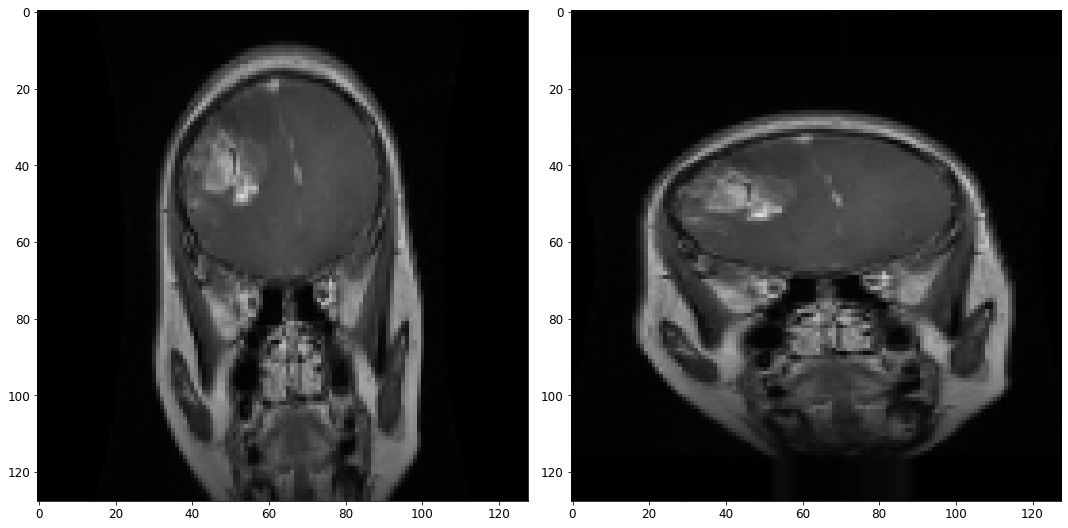

In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(3)]
plotImages(augmented_images)

In [19]:
image_gen = ImageDataGenerator(rescale=1./255, zca_whitening=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SIZE, IMG_SIZE))

C:\Python27\bill\lib\site-packages\keras\preprocessing\image.py:1285: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 5712 images belonging to 4 classes.


C:\Python27\bill\lib\site-packages\keras\preprocessing\image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Python27\bill\lib\site-packages\keras\preprocessing\image.py:1682: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


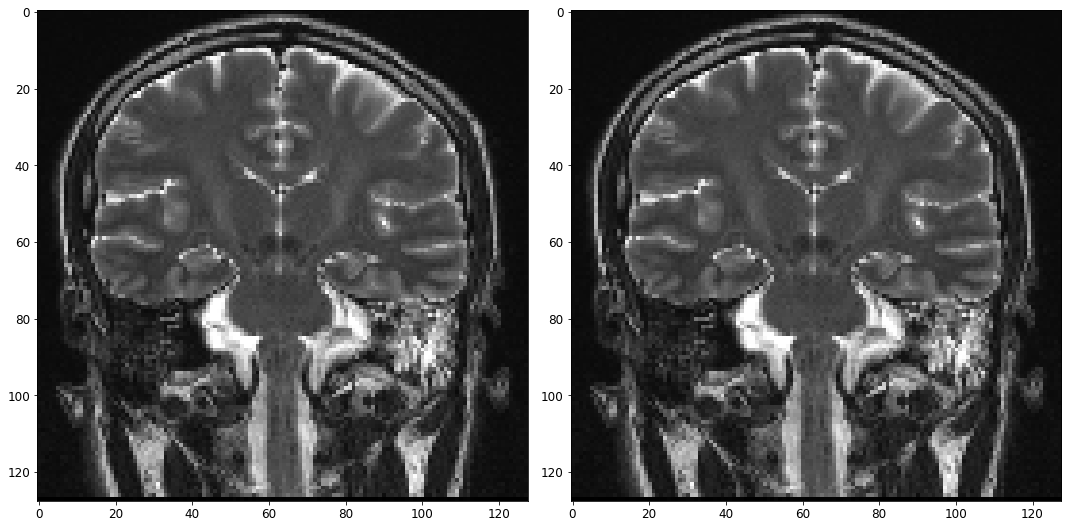

In [20]:
augmented_images = [train_data_gen[0][0][0] for i in range(3)]
plotImages(augmented_images)

In [21]:
image_gen_train = ImageDataGenerator(validation_split=0.25,
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.25,
    horizontal_flip=True,
    zca_whitening=True
   # fill_mode='nearest'
)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SIZE, IMG_SIZE),
                                                     class_mode='sparse',
                                                     subset='training',
                                                    seed=12345)

Found 4286 images belonging to 4 classes.


In [22]:
image_gen_val = ImageDataGenerator(rescale=1./255,validation_split=0.25)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=test_dir,
                                                 target_size=(IMG_SIZE, IMG_SIZE),
                                                 class_mode='sparse',
                                                 subset='validation',
                                                     seed=12345)

Found 327 images belonging to 4 classes.


In [23]:
model=keras.Sequential([
    Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(128,128,3)),
    MaxPooling2D((2,2),strides=2),
    Conv2D(64, (3,3),padding='same',activation='relu'),
    MaxPooling2D((2,2),strides=2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(4,activation='softmax')
])

In [24]:
myAdam = keras.optimizers.Adam(learning_rate = 0.0001)# пример создания оптимизатора 

In [25]:
optimizer = Adam(lr = 0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

C:\Python27\bill\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 128)               8

In [27]:

EPOCHS = 45

steps_per_epoch = None
validation_steps= None


history = model.fit(
    train_data_gen,
    validation_data = val_data_gen,
    steps_per_epoch= steps_per_epoch ,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_steps=validation_steps 
)

Epoch 1/45
268/268 [==============================] - 273s 1s/step - loss: 1.1002 - accuracy: 0.4792 - val_loss: 2.0086 - val_accuracy: 0.4648
Epoch 2/45
268/268 [==============================] - 253s 942ms/step - loss: 0.8497 - accuracy: 0.6391 - val_loss: 2.5556 - val_accuracy: 0.4190
Epoch 3/45
268/268 [==============================] - 250s 931ms/step - loss: 0.7702 - accuracy: 0.6846 - val_loss: 2.0854 - val_accuracy: 0.5138
Epoch 4/45
268/268 [==============================] - 248s 923ms/step - loss: 0.7293 - accuracy: 0.7035 - val_loss: 2.7011 - val_accuracy: 0.5076
Epoch 5/45
268/268 [==============================] - 243s 905ms/step - loss: 0.7155 - accuracy: 0.6988 - val_loss: 4.0599 - val_accuracy: 0.3700
Epoch 6/45
268/268 [==============================] - 242s 901ms/step - loss: 0.6878 - accuracy: 0.7161 - val_loss: 3.1274 - val_accuracy: 0.4190
Epoch 7/45
268/268 [==============================] - 240s 896ms/step - loss: 0.6718 - accuracy: 0.7413 - val_loss: 2.4172 - va

In [32]:
def open_images(paths):
    
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMG_SIZE,IMG_SIZE))
        image = np.array(image)/255.0# augment_image(image)
        images.append(image)
    return np.array(images)





unique_labels = os.listdir(test_dir)
def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels
            

batch_size = 32
steps = int(len(test_paths)/batch_size)
y_pred = []
y_true = []
for x,y in tqdm(datagen(test_paths, test_labels, batch_size=batch_size, epochs=1), total=steps):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)            

  0%|                                                                                           | 0/40 [00:00<?, ?it/s]

1/1 [==============================] - 0s 482ms/step


  2%|██                                                                                 | 1/40 [00:00<00:25,  1.51it/s]

1/1 [==============================] - 1s 570ms/step


  5%|████▏                                                                              | 2/40 [00:01<00:27,  1.38it/s]

1/1 [==============================] - 0s 483ms/step


  8%|██████▏                                                                            | 3/40 [00:02<00:26,  1.40it/s]

1/1 [==============================] - 1s 556ms/step


 10%|████████▎                                                                          | 4/40 [00:02<00:26,  1.37it/s]

1/1 [==============================] - 1s 524ms/step


 12%|██████████▍                                                                        | 5/40 [00:03<00:25,  1.35it/s]

1/1 [==============================] - 0s 469ms/step


 15%|████████████▍                                                                      | 6/40 [00:04<00:24,  1.41it/s]

1/1 [==============================] - 1s 557ms/step


 18%|██████████████▌                                                                    | 7/40 [00:05<00:24,  1.37it/s]

1/1 [==============================] - 0s 469ms/step


 20%|████████████████▌                                                                  | 8/40 [00:05<00:22,  1.42it/s]

1/1 [==============================] - 0s 453ms/step


 22%|██████████████████▋                                                                | 9/40 [00:06<00:21,  1.45it/s]

1/1 [==============================] - 1s 684ms/step


 25%|████████████████████▌                                                             | 10/40 [00:07<00:22,  1.32it/s]

1/1 [==============================] - 0s 459ms/step


 28%|██████████████████████▌                                                           | 11/40 [00:07<00:21,  1.35it/s]

1/1 [==============================] - 0s 480ms/step


 30%|████████████████████████▌                                                         | 12/40 [00:08<00:20,  1.40it/s]

1/1 [==============================] - 1s 510ms/step


 32%|██████████████████████████▋                                                       | 13/40 [00:09<00:19,  1.41it/s]

1/1 [==============================] - 0s 453ms/step


 35%|████████████████████████████▋                                                     | 14/40 [00:10<00:18,  1.40it/s]

1/1 [==============================] - 0s 470ms/step


 38%|██████████████████████████████▊                                                   | 15/40 [00:10<00:17,  1.43it/s]

1/1 [==============================] - 1s 507ms/step


 40%|████████████████████████████████▊                                                 | 16/40 [00:11<00:17,  1.40it/s]

1/1 [==============================] - 1s 521ms/step


 42%|██████████████████████████████████▊                                               | 17/40 [00:12<00:16,  1.41it/s]

1/1 [==============================] - 1s 614ms/step


 45%|████████████████████████████████████▉                                             | 18/40 [00:13<00:16,  1.33it/s]

1/1 [==============================] - 1s 595ms/step


 48%|██████████████████████████████████████▉                                           | 19/40 [00:13<00:16,  1.29it/s]

1/1 [==============================] - 1s 551ms/step


 50%|█████████████████████████████████████████                                         | 20/40 [00:14<00:15,  1.29it/s]

1/1 [==============================] - 1s 531ms/step


 52%|███████████████████████████████████████████                                       | 21/40 [00:15<00:14,  1.30it/s]

1/1 [==============================] - 1s 516ms/step


 55%|█████████████████████████████████████████████                                     | 22/40 [00:16<00:13,  1.33it/s]

1/1 [==============================] - 1s 502ms/step


 57%|███████████████████████████████████████████████▏                                  | 23/40 [00:16<00:12,  1.35it/s]

1/1 [==============================] - 0s 490ms/step


 60%|█████████████████████████████████████████████████▏                                | 24/40 [00:17<00:11,  1.38it/s]

1/1 [==============================] - 0s 437ms/step


 62%|███████████████████████████████████████████████████▎                              | 25/40 [00:18<00:10,  1.44it/s]

1/1 [==============================] - 0s 481ms/step


 65%|█████████████████████████████████████████████████████▎                            | 26/40 [00:18<00:09,  1.45it/s]

1/1 [==============================] - 0s 469ms/step


 68%|███████████████████████████████████████████████████████▎                          | 27/40 [00:19<00:08,  1.47it/s]

1/1 [==============================] - 1s 564ms/step


 70%|█████████████████████████████████████████████████████████▍                        | 28/40 [00:20<00:08,  1.40it/s]

1/1 [==============================] - 0s 469ms/step


 72%|███████████████████████████████████████████████████████████▍                      | 29/40 [00:20<00:07,  1.44it/s]

1/1 [==============================] - 1s 539ms/step


 75%|█████████████████████████████████████████████████████████████▌                    | 30/40 [00:21<00:07,  1.42it/s]

1/1 [==============================] - 1s 637ms/step


 78%|███████████████████████████████████████████████████████████████▌                  | 31/40 [00:22<00:06,  1.30it/s]

1/1 [==============================] - 0s 441ms/step


 80%|█████████████████████████████████████████████████████████████████▌                | 32/40 [00:23<00:06,  1.33it/s]

1/1 [==============================] - 1s 601ms/step


 82%|███████████████████████████████████████████████████████████████████▋              | 33/40 [00:24<00:05,  1.29it/s]

1/1 [==============================] - 1s 549ms/step


 85%|█████████████████████████████████████████████████████████████████████▋            | 34/40 [00:24<00:04,  1.29it/s]

1/1 [==============================] - 0s 452ms/step


 88%|███████████████████████████████████████████████████████████████████████▊          | 35/40 [00:25<00:03,  1.32it/s]

1/1 [==============================] - 1s 532ms/step


 90%|█████████████████████████████████████████████████████████████████████████▊        | 36/40 [00:26<00:02,  1.34it/s]

1/1 [==============================] - 0s 469ms/step


 92%|███████████████████████████████████████████████████████████████████████████▊      | 37/40 [00:26<00:02,  1.38it/s]

1/1 [==============================] - 0s 469ms/step


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 38/40 [00:27<00:01,  1.42it/s]

1/1 [==============================] - 1s 617ms/step


 98%|███████████████████████████████████████████████████████████████████████████████▉  | 39/40 [00:28<00:00,  1.37it/s]

1/1 [==============================] - 0s 445ms/step


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:29<00:00,  1.41it/s]

1/1 [==============================] - 0s 453ms/step


41it [00:29,  1.37it/s]                                                                                                


In [33]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

      glioma       0.90      0.46      0.61       300
  meningioma       0.73      0.24      0.36       306
     notumor       0.62      0.99      0.76       405
   pituitary       0.50      0.68      0.57       300

    accuracy                           0.62      1311
   macro avg       0.69      0.59      0.57      1311
weighted avg       0.68      0.62      0.59      1311



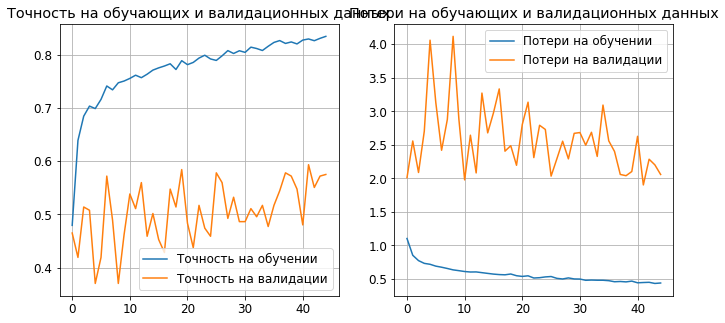

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(11,5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность на обучении')
plt.plot(epochs_range, val_acc, label='Точность на валидации')
plt.legend(loc='best')
plt.title('Точность на обучающих и валидационных данных')
plt.grid()


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучении')
plt.plot(epochs_range, val_loss, label='Потери на валидации')
plt.legend(loc='best')
plt.title('Потери на обучающих и валидационных данных')
plt.savefig('./foo.png')
plt.grid()
plt.show()

Матрица ошибок модели [[137  23  36 104]
 [ 14  72 117 103]
 [  0   4 401   0]
 [  1   0  96 203]]


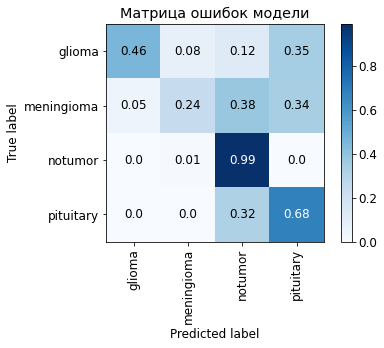

In [35]:
cl = confusion_matrix(y_true,y_pred)
print('Матрица ошибок модели',cl)
skplt.metrics.plot_confusion_matrix(y_true,y_pred,
                                    normalize=True,
                                    title="Матрица ошибок модели",x_tick_rotation=90,
                                    cmap="Blues");

Матрица ошибок модели [[ 53  91  12 144]
 [  5 103  86 112]
 [  0   5 375  25]
 [  2   2  76 220]]